In [5]:
# Import Packages
import os
# Change to the working directory
os.chdir('/Users/zepedalab/Desktop/MATHia_NLP_YB')
#Lab Laptop wd:/Users/zepedalab/Desktop/MATHia_NLP_YB
#Home Desktop wd: /Users/yuchengbao/Desktop/ALL Lab/MATHia_NLP

import pandas as pd
import re
import spacy
!python3 -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

/Users/zepedalab/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 40.8 MB/s eta 0:00:00 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [69]:
# Import Data File
text_df = pd.read_excel('/Users/zepedalab/Desktop/MATHia_NLP_YB/E1C3 Codes + partial E2C3.xlsx')

In [71]:
# Pre-process the text data (text_df)
# Convert the text input to the lower case string
# Remove all non-alphabetic characters
text_df['input'] = text_df['input'].astype(str)
text_df['input'] = text_df['input'].str.lower()
text_df['input'] = text_df['input'].str.replace(r'[^a-zA-Z\s]', '', regex=True)
# Filter out any input that comprise less than 3 characters
text_df = text_df[text_df['input'].str.len() >= 3]
short_input_df = text_df[text_df['input'].str.len() < 3] #short_input_df allows us to manually check

In [72]:
# Detecting the nonsense string
from nostril import nonsense
short_indices = []
nonsense_indices = []

# Iterate through rows and separate nonsense rows
for index, row in text_df.iterrows():
    try:
        text = row['input']
        if len(text) < 6: # Check if the text is too short to test
            # Add the short text to short_text_df
            if len(text) < 6:
                short_indices.append(index)
            continue

        # Use nostril to detect nonsense in the current row's text
        if nonsense(text):
            nonsense_indices.append(index)

    except Exception as e:
        msg = str(e)
        if "Text is too short to test" in msg:
             short_indices.append(index)
        else:
            print(f"Error processing row {index}: {e}")

short_text_df = text_df.loc[short_indices]
nonsense_df = text_df.loc[nonsense_indices]
text_df = text_df.drop(short_indices + nonsense_indices)

In [73]:
# Pre-process those shor input by using the gibberish detector
from gibberish_detector import detector
#os.chdir('/Users/yuchengbao/Desktop/ALL Lab/MATHia_NLP')
#os.system('gibberish-detector train big.txt > gibberish-detector.model')
Detector = detector.create_from_model('/Users/zepedalab/PycharmProjects/MATHia-NLP-YB/gibberish-detector.model')
#lab wd: /Users/zepedalab/PycharmProjects/MATHia-NLP-YB/gibberish-detector.model

In [74]:
gibberish_indices = []

# Iterate through rows and separate gibberish rows
for index, row in text_df.iterrows():
    try:
        # Check if the row is gibberish
        is_gibberish = Detector.is_gibberish(row['input'])

        # If it is gibberish, add to the gibberish_df and remove from text_df_3
        if is_gibberish:
            gibberish_indices.append(index)

    except Exception as e:
        print(f"Error processing row {index}: {e}")

gibbersh_df = text_df.loc[gibberish_indices]

In [77]:
# Import necessary packages for the later NLP analysis
import gensim
import gensim
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Download the wordnet resource if not already done
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zepedalab/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zepedalab/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [78]:
# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

# Tokenize and lemmatize the documents
tokenized_docs = [
    [lemmatizer.lemmatize(word.lower()) for word in gensim.utils.tokenize(doc)
     if word.lower() not in stop_words and word.isalpha()]
    for doc in text_df_3.input
    if len([word for word in gensim.utils.tokenize(doc) if word.lower() not in stop_words and word.isalpha()]) > 0
]

# Create filtered_docs: Only keep non-empty documents
filtered_docs = [doc for doc in tokenized_docs if len(doc) > 0]

# Filter text_df to remove rows that correspond to empty tokenized documents
# Ensure that text_df_filtered matches filtered_docs in length
text_df_filtered = text_df.iloc[:len(filtered_docs)].reset_index(drop=True)

Length of filtered_docs: 447
Length of text_df_3_filtered: 447


In [79]:
# create empty dictionary from gensim library (for the vocabulary)
dictionary = gensim.corpora.Dictionary()
# iteratively add each doc to the bag-of-words corpus
bow_corpus = [dictionary.doc2bow(doc, allow_update=True) for doc in filtered_docs]

print(len(bow_corpus))
print(len(dictionary))

447
672


In [80]:
for doc in bow_corpus:
    print([[dictionary[id], freq] for id, freq in doc])

print(len(dictionary))

[['awaly', 1], ['better', 1], ['last', 1], ['time', 1]]
[['ask', 2], ['class', 1], ['classmate', 1], ['fellow', 1], ['focus', 1], ['help', 1], ['teacher', 1], ['work', 1]]
[['help', 1], ['work', 1], ['didnt', 1], ['hecking', 1], ['hit', 1], ['make', 1], ['since', 1], ['solve', 1], ['use', 1], ['would', 1]]
[['would', 1], ['fail', 1], ['happen', 1], ['motivated', 1], ['thinking', 1]]
[['work', 1], ['less', 1]]
[['going', 1], ['hard', 1], ['kept', 1], ['worked', 1]]
[['hard', 1], ['worked', 1], ['done', 1], ['get', 1], ['try', 1]]
[['get', 1], ['idk', 1], ['school', 1]]
[['time', 1], ['focus', 1], ['took', 1]]
[['keep', 1], ['tring', 1]]
[['many', 1], ['motivate', 1], ['ok', 1], ['one', 1], ['question', 1], ['saying', 1], ['way', 1]]
[['work', 1], ['motivated', 1], ['hard', 1], ['myslef', 1], ['reminding', 1], ['reward', 1]]
[['end', 1], ['goal', 1], ['set', 1], ['something', 1], ['want', 1]]
[['time', 1], ['didnt', 1], ['get', 1], ['took', 1], ['focused', 1], ['stressed', 1]]
[['thinkin

In [81]:
import numpy as np

# Get vocab from dictionary
vocab = pd.Series(dictionary.token2id).index

# Sequence of numbers as long as the documents
index = range(len(bow_corpus))

# Create a pandas dataframe full of zeros.
bow_df = pd.DataFrame(data=np.zeros((len(bow_corpus), len(dictionary)), dtype=np.float32),
                  index=index, # row labels
                  columns=vocab) #column labels

# Add each word from the bag-of-words corpus to the matrix.
for idx in index:
  for id, freq in bow_corpus[idx]:
    bow_df.loc[idx,dictionary[id]] = freq
    # updates the specific cell in the DataFrame using by using the document index (row) idx
    # and token ID (column) id, which has been mapped back into the token (word)
    # and sets it to the token's frequency freq

# Transpose the matrix for easy reading
bow_df.T

,0,1,2,3,4,5,6,7,8,9,...,437,438,439,440,441,442,443,444,445,446
awaly,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
better,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
last,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
time,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ask,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
unit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
went,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
push,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
continue,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [82]:
# Calculating Inverse Document Frequency

num_documents = len(bow_df) #get the length of the documents
print(num_documents) #this will be six. Note the df is not transposed

# function of idf
def idf(term):
  documents_containing_term = (bow_df[term] > 0).sum()    # sum of documents containing the term
  return np.log(num_documents+1/documents_containing_term+1)  # divide the number of documents by the num documents with the term and get the log.

# dictionary comprehension to apply the idf function to every word (column) in the bow_df DataFrame
idf = pd.Series({term:idf(term) for term in bow_df.columns}) # create dictionary with key value pair of term:idf(term)
idf

447


awaly           6.107023
better          6.105072
last            6.105537
time            6.104996
ask             6.105165
                  ...   
unit            6.107023
went            6.107023
push            6.107023
continue        6.107023
okasadjdbhjf    6.107023
Length: 672, dtype: float64

In [83]:
#Calculate Term Frequency
# divide each token count by the total token count for the row.
tf_df = bow_df.div(bow_df.sum(axis='columns'), axis='rows')

tf_df

,awaly,better,last,time,ask,class,classmate,fellow,focus,help,...,enough,pay,sucessful,belving,motavited,unit,went,push,continue,okasadjdbhjf
0,0.25,0.25,0.25,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
1,0.00,0.00,0.00,0.00,0.222222,0.111111,0.111111,0.111111,0.111111,0.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
2,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
3,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
4,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
443,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0
444,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
445,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0


In [84]:
#Calculate the TF-IDF score

tfidf_df = tf_df.copy().multiply(idf, axis='columns')
# make copy of tf_df that is tf/idf

# Transpose it for readability
tfidf_df

,awaly,better,last,time,ask,class,classmate,fellow,focus,help,...,enough,pay,sucessful,belving,motavited,unit,went,push,continue,okasadjdbhjf
0,1.526756,1.526268,1.526384,1.526249,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,1.356703,0.678346,0.678434,0.678558,0.678333,0.678321,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.610489,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
443,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.526249,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.526756,0.000000
444,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
445,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,6.107023


Willpower
0    343
1    104
Name: count, dtype: int64

Balanced class counts:
Willpower
1    104
0    104
Name: count, dtype: int64

Classes in classifier: [0 1]

Logistic Regression Accuracy (Balanced Data): 0.9375
Logistic Regression Precision (Balanced Data): 0.941747572815534
Logistic Regression Recall (Balanced Data): 0.9326923076923077

Classification Report (Balanced Data):
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       104
           1       0.94      0.93      0.94       104

    accuracy                           0.94       208
   macro avg       0.94      0.94      0.94       208
weighted avg       0.94      0.94      0.94       208



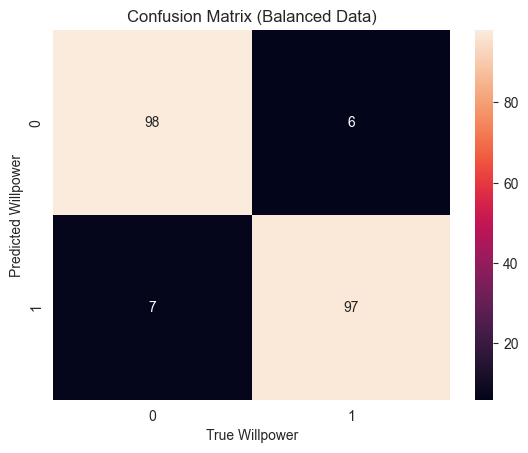


Side-by-side comparison of top positive and negative predictors:
   feature_pos  coefficient_pos feature_neg  coefficient_neg
0        tried         1.037077      finish        -0.501451
1        super         0.866841    thisssss        -0.508807
2         used         0.775689      batman        -0.509351
3       saying         0.704378     working        -0.526565
4         clam         0.695362       learn        -0.540873
5           go         0.668221         mom        -0.543311
6       coukld         0.660508       right        -0.553686
7      collage         0.658398        hard        -0.555110
8         time         0.655763       topic        -0.567681
9         jusr         0.608727    continue        -0.575087
10      worked         0.579433        tell        -0.629135
11       never         0.568127        many        -0.632637
12       stuck         0.550106         idk        -0.678447
13        good         0.536293        hint        -0.692757
14   workspace     

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# =====================================
# 0. Define labels and align with TF-IDF
# =====================================

# Original labels
y_raw = text_df_filtered['Willpower']

# Make sure X (tfidf_df) and y share the same indices
valid_idx = tfidf_df.index.intersection(y_raw.index)

X = tfidf_df.loc[valid_idx]
y = y_raw.loc[valid_idx]
print(y.value_counts())

# Build a balanced sub-dataset with equal number of sample coded as 0 and 1

class_counts = y.value_counts()
minority_class = class_counts.idxmin()
majority_class = class_counts.idxmax()
n_minority = class_counts.min()

# Indices for each class
minority_idx = y[y == minority_class].index
majority_idx_sampled = y[y == majority_class].sample(
    n=n_minority,
    random_state=12434  # reproducibility
).index

balanced_idx = minority_idx.union(majority_idx_sampled)

X_bal = X.loc[balanced_idx]
y_bal = y.loc[balanced_idx]

# Shuffle rows
X_bal, y_bal = shuffle(X_bal, y_bal, random_state=14312)

print("\nBalanced class counts:")
print(y_bal.value_counts())

#Using the balanced dataset to train the machine learning logistic regression model

bal_classifier = LogisticRegression(max_iter=1000)
bal_classifier.fit(X_bal, y_bal)

print("\nClasses in classifier:", bal_classifier.classes_)

# Predict on balanced data (for quick check)
predicted_bal = bal_classifier.predict(X_bal)

# Print out the evaluation metrics

print("\nLogistic Regression Accuracy (Balanced Data):",
      metrics.accuracy_score(y_bal, predicted_bal))
print("Logistic Regression Precision (Balanced Data):",
      metrics.precision_score(y_bal, predicted_bal))
print("Logistic Regression Recall (Balanced Data):",
      metrics.recall_score(y_bal, predicted_bal))

print("\nClassification Report (Balanced Data):\n",
      metrics.classification_report(y_bal, predicted_bal))

# Confusion matrix
cm_bal = metrics.confusion_matrix(y_bal, predicted_bal)

sns.heatmap(cm_bal, annot=True, fmt='d')
plt.title('Confusion Matrix (Balanced Data)')
plt.xlabel('True Willpower')
plt.ylabel('Predicted Willpower')
plt.show()

# Print out the logistic coefficients for the top word list

# For binary classification in sklearn:
# bal_classifier.coef_[0] corresponds to the SECOND class in bal_classifier.classes_
positive_class = bal_classifier.classes_[1]

coef = bal_classifier.coef_[0]         # shape: (n_features,)
feature_names = X_bal.columns          # TF-IDF feature names

coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coef
})

# Sort descending: largest positive coefficients first
coef_df_sorted = coef_df.sort_values(by='coefficient', ascending=False)

highest_20 = top_20_pos.reset_index(drop=True)
lowest_20 = top_20_neg.reset_index(drop=True)

highest_20.columns = [col + "_pos" for col in highest_20.columns]
lowest_20.columns = [col + "_neg" for col in lowest_20.columns]

coef_compare = pd.concat([highest_20, lowest_20], axis=1)

print("\nSide-by-side comparison of top positive and negative predictors:")
print(coef_compare)
